# 水文分析系統-工程模式工具

V0.1.1

# Init All

In [1]:
import pandas as pd
from codes.db import * 
from codes.lib import *
from codes.riverlog import *
import pandasql as ps

from datetime import datetime,date

gd={}
conn=connect_db()
if 1:
    load_ods(gd)
    riverlog_info_setup(gd)
#sql_keys
#sql_keypairs

Connected to the PostgreSQL database...
sys 的 sheets:
 dict_keys(['description', 'table_def', 's_syspar', 's_info_line', 's_info_area', 's_timeseq_rpt', 's_repeat_job', 's_topology_kind', 's_gis_layer', 's_info_point', 's_topology_transfer', 's_topology_node', 's_topology_edge', 's_village_waterin', 's_waterin_qty', 's_waterwork_qty', 's_waterin_quality', 's_value_domain', 's_waterin_b']) 
basic 的 sheets:
 dict_keys(['table_def', 'b_表單說明', 'b_colmeta', 'b_水資源分區', 'b_水資源局', 'b_河川局', 'b_流域', 'b_河川', 'b_排水', 'b_水庫', 'b_水質水量保護區', 'b_水庫集水範圍', 'b_水庫集水區敏感區', 'b_堤防', 'b_排水設施', 'b_水門', 'b_抽水站', 'b_河川斷面樁', 'b_雨量站', 'b_河川水位站', 'b_浮標站', 'b_潮位站', 'b_地下水分區', 'b_地下水觀測井']) 
rain-station: output/rain-station.csv saved, shape = (2149, 6)
reservoir-info: output/reservoir-info.csv saved, shape = (152, 22)
waterLevel-station: output/waterLevel-station.csv saved, shape = (5176, 13)
waterLevelDrain-station: output/waterLevelDrain-station.csv saved, shape = (1189, 4)
waterLevelAgri-station: output/waterLevelA

# 使用範例

In [2]:
#df = sql_to_df(conn,sql)  
#sql_exec(conn,sql)
#print(view_by_key(None,None).keys())
#df=view_by_key(conn,'info_tables')
#key_to_value(conn,'b_流域','basin_id',130000,"basin_cname")
#key_to_value_help(conn,'b_流域','basin_id') #key_to_value_help(conn,None,None)
#df=keypar_to_view('basin_test',['頭前溪','濁水溪','大甲溪'],"str")
#df=keypar_to_view('basin_test2',['頭前溪','濁水溪'],"pos")
#df=keypar_to_view(conn,'station_by_basinname',['頭前溪'],"pos")
#df

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,postgis,public,b_地下水分區,BASE TABLE,None,None,None,None,None,YES,NO,None
1,postgis,public,b_地下水觀測井,BASE TABLE,None,None,None,None,None,YES,NO,None
2,postgis,public,b_堤防,BASE TABLE,None,None,None,None,None,YES,NO,None
3,postgis,public,b_抽水站,BASE TABLE,None,None,None,None,None,YES,NO,None
4,postgis,public,b_排水,BASE TABLE,None,None,None,None,None,YES,NO,None
...,...,...,...,...,...,...,...,...,...,...,...,...
128,postgis,public,watrelin,BASE TABLE,None,None,None,None,None,YES,NO,None
129,postgis,public,wrarb,BASE TABLE,None,None,None,None,None,YES,NO,None
130,postgis,public,yl106107,BASE TABLE,None,None,None,None,None,YES,NO,None
131,postgis,public,yl81108_polyline,BASE TABLE,None,None,None,None,None,YES,NO,None


In [261]:
if 0:
    #sql = "select * from rivercode order by river_id"
    sql = "select ST_AsGeoJson(geom) as geom_json from basin where basin_name='頭前溪'"
    df = sql_to_df(conn,sql)  

if 0:
    sql="""
    CREATE TABLE "河川局" (
        a DECIMAL, 
        rvb_no DECIMAL, 
        rvb_name VARCHAR, 
        area BOOLEAN, 
        "水資源分區代號" BOOLEAN
    );

    """
    sql_exec(conn,sql)

if 0:
    close_db(conn)
if 0:
    #print("\n".join(get_table_list()))
    df = view_by_key(conn,'b_流域')
    

if 0:
    sql="select * from r_rain_station where \"stationID\"='00H710'"
    df = sql_to_df(conn,sql)
#df

if 0: #同名欄位分析
    df = view_by_key(conn,'info_columns')
    value_bins = df['column_name'].value_counts()
    #value_bins[value_bins>1].to_csv('output/cols_count.csv')
    value_bins[value_bins>10]
    #df[df['column_name']=='gid']

if 0: # 當場加 sql_keys 來使用
    sql_keys['level_riverpoly_rivercode']=\
    "select S.st_no,S.name_c,S.tri_name,ST_Distance(S.geom,R.geom) as dist from RIVWLSTA_e as S \
        join riverpoly_rivercode as R\
            on S.tri_name=R.river_name\
    order by dist;"
    df=view_by_key(conn,'level_riverpoly_rivercode')
if 0: # 當場加 sql_keypairs 來使用
    sql_keypairs['level_in_reservoir']=\
    "select S.st_no, S.name_c, R.name from RIVWLSTA_e as S \
        join reservoir as R \
            on ST_Within(S.geom,R.geom) \
    where name in (%s);"
    df=keypar_to_view(conn,'level_in_reservoir',['隆恩堰'],"str")

if 0: # save geom_json to file
    with open('output/test2.geojson', 'w') as f:
        f.write(df['geom_json'].to_list()[0])


# 目前練習

In [ ]:
#key_to_value_help(conn,None,None)
#key_to_value_help(conn,'b_河川','river_id')
#key_to_value_help(conn,'rivercode',None)

df=view_by_key(conn,'rivercode')
#print(key_to_value(conn,'b_河川','river_id',130000.0,"river_cname"))

df

In [228]:
# 測站離河流距離
sql="select tri_name,st_no,name_c,ST_AsEWKT(geom) as ewkt from RIVWLSTA_e \
    where tri_name in ('頭前溪','上坪溪','油羅溪');"
#sql="select tri_name,st_no,name_c,ST_AsEWKT(geom) as ewkt from RIVWLSTA_e;"
df = sql_to_df(conn,sql)

print("水位站(RIVWLSTA_e) 跟河川河道(riverpoly)的距離:")
print("測站,河流,距離")
for row in df.iterrows():
    sql = "select river_name,ST_Distance(geom,ST_GeomFromText('%s')) as dist from riverpoly \
        where river_name='%s' order by dist limit  1" \
        % (row[1]['ewkt'],row[1]['tri_name'])
    df1 = sql_to_df(conn,sql)
    dist = df1['dist'].to_list()
    if len(dist)==0:
        print("%s,%s can't get distance" %(row[1]['name_c'],row[1]['tri_name']))
    else:
        if dist[0]>=0: #距離 filter
            print("%s,%s,%.2f" %(row[1]['name_c'],row[1]['tri_name'],dist[0]))

水位站(RIVWLSTA_e) 跟河川河道(riverpoly)的距離:
測站,河流,距離
內灣,油羅溪,0.00
上坪,上坪溪,0.00
竹林大橋,頭前溪,0.00
經國橋,頭前溪,0.00
竹林大橋(左岸),頭前溪,0.00
五峰大橋,上坪溪,38.12
舊港橋,頭前溪,164.20
竹港大橋,頭前溪,18.38
中正大橋,頭前溪,44.94
頭前溪橋,頭前溪,1.64
道將圳,頭前溪,7764.45


# 拓墣

In [242]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
def gen_rivertree(conn,filename, rivercode="",id_with_name=False):
    """ 
        load river tree from db:rivercode to networkx graph,df, output dot format
        parameter: 
            filename: filename for dot
            rivercode: rivercode or "" for all
            id_with_name: graph ID with name?
            
        ex: gen_rivertree(dot_filename, "130000")
        return: [G,df]
    
    """

    G = nx.Graph()
    try:
        sql = "select * from rivercode order by river_id"
        df = pd.read_sql(sql, conn)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)

    
    lines = []
    dot_strs = {}
    for index, row in df.iterrows():
        link = row['river_link']
        if not rivercode=="":
            if not rivercode in link:
                continue
        #print("processing: %s" %(link))
        cols = link.split("@")
        for i in range(len(cols)-1):
            if cols[i]=='0':
                river_name1 = "海"
                name1 = river_name1
            else:
                river_name1 = df[df['river_id']==cols[i]]['river_name'].values.tolist()
                if len(river_name1)>0:
                    name1 = river_name1[0]
                else:
                    name1 = "Undefined"
            river_name2 = df[df['river_id']==cols[i+1]]['river_name'].values.tolist()
            
            #print("river_name2=%s" %(river_name2[0]))
            if len(river_name2)>0:
                name2 = river_name2[0]
            else:
                name2 = "Undefined"
            dot_str = "\"%s_\\n%s\"->\"%s_\\n%s\"" %(cols[i+1],name2,cols[i],name1)
            #G.add_nodes_from([cols[i], cols[i+1]])
            if id_with_name:
                n2="%s\n%s" %(cols[i+1],name2)
                n1="%s\n%s" %(cols[i],name1)
                G.add_node(n2, name=name2)
                G.add_node(n1, name=name1)
                G.add_edges_from([(n2, n1)])
            else:
                G.add_node(cols[i+1], name=name2)
                G.add_node(cols[i], name=name1)
                G.add_edges_from([(cols[i+1], cols[i])])
            if dot_str not in dot_strs:
                dot_strs[dot_str]=1
                #print("dot string: %s" %(dot_str))
                lines.append(dot_str)                     
       
    fp = open(filename, "w")
    lines.sort()
    fp.write("%s%s%s" %("digraph G {\n\t\n","\t" + "\n\t".join(lines),"\n}\n"))
    fp.close() 
    return G,df



def output_graph(G,labels,output_id):
    """
    output_id: 1(print) , 2(gml), 3(plot)
    """
    if output_id==1: #print
        print(list(G.nodes))
        print(list(G.edges))
        #print(G.nodes['130000'])
    if output_id==2: #gml
        nx.readwrite.gml.write_gml(G,"output/rivertree.gml")
    if output_id==3: #plot
        from matplotlib.font_manager import FontProperties
        myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
        pos = nx.spring_layout(G)
        colors = range(len(G.edges))
        options = {
            "node_color": "#A0CBE2",
            #"edge_color": colors,
            "width": 1,
            #"edge_cmap": "#A0CBE2",
            "with_labels": True,
        }
        if not labels is None:
            nx.draw(G, pos, font_family='SimSun',labels=labels,**options)
        else:
            nx.draw(G, pos, font_family='SimSun',**options)
        #fig = plt.gcf()
        #fig.set_size_inches(8.5, 6)
        plt.show()
    if output_id==4: # write dot,need pygraphviz (too many packages need to install, abort)
        from networkx.drawing.nx_agraph import write_dot
        write_dot(G, "output/topology.dot")

    #nx.readwrite.nx_shp.write_shp(G, "output/rivertree.shp")

def gen_topology(filename,id_with_name):
    """
        load topoloy from gd['sys']['s_topology_node'],gd['sys']['s_topology_edge'] 
            to networkx graph,df, output dot format
        parameter: 
            filename: filename for dot
            
        ex: gen_topology(dot_filename)
        return: [G,labels]
    """
    G = nx.Graph()
    df_node = gd['sys']['s_topology_node'] #node_id,node_name
    df_edge = gd['sys']['s_topology_edge'] #edge_id,node1_id,node2_id,edge_name
    
    lines = []
    dot_strs = {}
    labels = {}
    for index, row in df_node.iterrows():

        labels[row['node_id']]=row['node_name']
        G.add_node(row['node_id'],node_name=row['node_name'],kind=row['kind'],\
            layer_name=row['layer_name'],feature_def=row['feature_def'])

    for index, row in df_edge.iterrows():

        n1=row['node1_id']
        n2=row['node2_id']
        #G.add_edges_from([(n1, n2)],\
        #    edge_id=row['edge_id'],edge_name=row['edge_name'],kind=row['kind'])
        G.add_weighted_edges_from([(n1, n2,1)],\
            edge_id=row['edge_id'],edge_name=row['edge_name'],kind=row['kind'])
        
        #G.add_edges_from(n1, n2)

        t1=get_value_by_index(df_node,"node_id=%s" %(n1), 'node_name')
        t2=get_value_by_index(df_node,"node_id=%s" %(n2), 'node_name')
        if id_with_name: 
            dot_str = "\"%s_\\n%s\"->\"%s_\\n%s\"  [dir=none]" %(n1,t1,n2,t2)
        else:
            dot_str = "\"%s\"->\"%s\" [dir=none]" %(t1,t2)
        if dot_str not in dot_strs:
            dot_strs[dot_str]=1
            #print("dot string: %s" %(dot_str))
            lines.append(dot_str)                        
    if 1:
        fp = open(filename, "w")
        lines.sort()
        fp.write("%s%s%s" %("digraph G {\n\t\n","\t" + "\n\t".join(lines),"\n}\n"))
        fp.close() 
    return G,labels
def topo_node_desc(G,node_id):
    import numpy as np
    if not node_id in G._node.keys():
        print("%s not exist!" %(node_id))

    df_node = gd['sys']['s_topology_node'] #node_id,node_name
    df_edge = gd['sys']['s_topology_edge'] #edge_id,node1_id,node2_id,edge_name
    df_tran = gd['sys']['s_topology_transfer'] #from_類別	類別情境與問題	to_類別	json_def	說明
    
    #node
    node = G._node[node_id]
    #node_name=get_value_by_index(df_node,"node_id=%s" %(node_id), 'node_name')
    node_name = node['node_name']
    print("node %s(%s):%s have these edges:" %(node_id,node_name,node['kind']))
    #edge
    for edge_id in G._adj[node_id].keys():
        #edge_name=get_value_by_index(df_node,"node_id=%s" %(edge), 'node_name')
        edge = G._adj[node_id][edge_id]
        edge_name = edge['edge_name']
        print("%s(%s) -- %s(%s):%s" %(node_id,node_name,edge_id,edge_name,edge['kind']))
    
    #transfer
    f_tran=df_tran['from_類別']==node['kind']
    print("%s(%s) 有以下問題：" %(node_id,node_name))
    for index, row in df_tran[f_tran].iterrows():
        print("%s" %(row['類別情境與問題']))
        #if not np.isnan( row['json_def']):
        if not pd.isnull(row['json_def']):
            print("json_def:%s" %(row['json_def']))
            
    # 圖層圖位與內容
    layer_name = node['layer_name']
    print("%s(%s) locate at layer_name %s, feature %s" %(node_id,node_name,layer_name,node['feature_def'])) 
    
    # 圖位中的資訊
    if layer_name in gd['sys'].keys():
        df_layer=gd['sys'][layer_name]
        desc=get_value_by_index(df_layer,node['feature_def'], 'desc')
        print("feature description: %s" %(desc))
        
    
    
            
def topo_question_act(G,node_id,q_str,q_type, q_par=None):
    """ 某個 node 點選，某個問題，目前指定動作跟參數
    q_str: 類別情境與問題
    q_type:: kind: 找某一類別的 node
    q_par: 可選參數，是個 list,預設為 None
    """
    df_tran = gd['sys']['s_topology_transfer']
    df_node = gd['sys']['s_topology_node'] #node_id,node_name
    f_q=df_tran['類別情境與問題']==q_str
    df_tran1=df_tran[f_q]
    node= G._node[node_id]
    node_name = node['node_name']
    
    if q_type=="kind": #找某一類別的 node
        for n2_id in G._adj[node_id].keys():
            edge = G._adj[node_id][n2_id]
            edge_name = edge['edge_name']
            #f_node=df_node['node_id']==n2_id
            node2= G._node[n2_id]
            kind = node2['kind']
            #node_name2=df_node[f_node]['node_name'].to_list()[0]
            node_name2 = node2['node_name']
            if kind==df_tran1['to_類別'].to_list()[0]:
                print("%s(%s) 問 %s 答案：  %s(%s):%s" %(node_id,node_name,q_str,n2_id,node_name2,kind))
                return n2_id
            else:
                pass
                #print("INFO: checking edge: %s" %(edge_name))

def topo_set_bylen(G,node_id,length):
    """ 取得跟某點距離<=某值的點位
    """
    from networkx.algorithms import shortest_paths as sp
    import networkx.classes.function as fun
    print("shortest_path_length of %s:" %(node_id))
    paths=sp.shortest_path_length(G,source=node_id)
    node_list=[]
    edge_key=[]
    for p in paths:
        if paths[p]!=0:
            if paths[p]<=length:
                print("with %s length %s" %(p,paths[p]))
                node_list.append(p)
        if paths[p]<length:
            edge_key.append(p)
    edge_list=fun.edges(G,edge_key)
    
    return node_list,edge_list

def topo_check(G):
    import networkx.classes.function as fun
    #沒有 edge 的點
    degree = fun.degree(G)
    print("these nodes have no edge:")
    for d in degree:
        #print(d)
        if d[1]==0:
            print("%s" %(d[0]))
    
    

In [243]:
#gen_rivertree("") # 全部
if 0:
    [G,df]= gen_rivertree(conn,"output/rivertree.dot","130000",True) 
    output_graph(G,None)

if 0:
    [G,labels] = gen_topology("output/topology.dot",True)
    #output_graph(G,labels,3)
    #G._node['hash-3']
    #G._adj['hash-3'].keys()
    
if 0:
    topo_node_desc(G,'hash-2')

    node_id=topo_question_act(G,'hash-2','取水口為何','kind',None)
    #topo_question_act(G,'hash-3','集水區為何','kind',None)
    
    topo_node_desc(G,node_id)

if 0: # 某點距離<3 的所有node,edge
    node_id='hash-1'
    length=3
    node_list,edge_list = topo_set_bylen(G,node_id,length)
    print("%s nearby %i nodes: %s" %(node_id,length, node_list))
    print("edges:%s" %(edge_list)) 
if 1:
    topo_check(G)

these nodes have no edge:
hash-7


# 拓樸演算法學習

In [249]:
if 0:
    from networkx.algorithms import approximation as approx
    #approx.node_connectivity(G,s='hash-3',t='hash-7')
    #approx.local_node_connectivity(G,'hash-2','hash-5')

if 0:
    from networkx.algorithms import distance_measures as dm
    print("----- distance_measures:")
    print("center: %s " %(dm.center(G)))

if 0:
    from networkx.algorithms import shortest_paths as sp
    print("----- shortest_paths:")
    node_id='hash-3'
    print("shortest_path_length of %s:" %(node_id))
    paths=sp.shortest_path_length(G,source=node_id)
    for p in paths:
          print("%s:%s" %(p,paths[p]))
    print("all shortest_path:")
    paths = sp.shortest_path(G)
    for p in paths.keys():
        print("%s path:%s" %(p,paths[p]))
    print("shortest_path from %s to %s:%s" %('hash-1','hash-6',sp.shortest_path(G,source='hash-1',target='hash-6')))
    print("has_path:: %s to %s:%s" %('hash-1','hash-6', sp.has_path(G,'hash-1','hash-6')))

    
if 0: #function
    import networkx.classes.function as fun
    print("---------- function:")
    print("----- Graph:")
    print("degress: %s " %(fun.degree(G)))
    print("degree_histogram:%s" %(fun.degree_histogram(G)))
    print("density: %s " %(fun.density(G)))
    print("info: %s " %(fun.info(G)))
    print("is_directed: %s " %(fun.is_directed(G)))
    print("subgraph: %s " %(fun.subgraph(G,None)))
    
    print("----- Nodes:")
    print("nodes: %s " %(fun.nodes(G)))
    print("number_of_nodes: %s " %(fun.number_of_nodes(G)))
    print("neighbors of %s:" %('hash-3'))
    for n in fun.neighbors(G,'hash-3'):
        print(n)
    print("all_neighbors of %s " %('hash-3'))
    for n in fun.all_neighbors(G,'hash-3'):
        print(n)
    print("non_neighbors of %s " %('hash-3'))
    for n in fun.non_neighbors(G,'hash-3'):
        print(n)
    print("common_neighbors of %s -- %s " %('hash-2','hash-4'))
    for n in fun.common_neighbors(G,'hash-2','hash-4'):
        print(n)
    print("----- Edges:")
    print("all edges: %s " %(fun.edges(G)))
    nodes=['hash-3','hash-1']
    print("nodes %s edges: %s " %(nodes,fun.edges(G,nodes)))
    print("non_edges: ")
    for n in fun.non_edges(G):
        print(n)
    print("----- Attributes:")
    print("is_weighted: %s " %(fun.is_weighted(G)))
    print("get_node_attributes of kind:%s " %(fun.get_node_attributes(G,'kind')))
    path=['hash-2','hash-3','hash-4']
    print("is_path %s: %s " %(path,fun.is_path(G,path)))
    
    
    
    #fun.nodes(G)
    #fun.edges(G)


----- shortest_paths:
shortest_path_length of hash-3:
hash-3:0
hash-6:1
hash-5:1
hash-2:1
hash-4:1
hash-1:2
all shortest_path:
hash-1 path:{'hash-1': ['hash-1'], 'hash-2': ['hash-1', 'hash-2'], 'hash-3': ['hash-1', 'hash-2', 'hash-3'], 'hash-4': ['hash-1', 'hash-2', 'hash-3', 'hash-4'], 'hash-5': ['hash-1', 'hash-2', 'hash-3', 'hash-5'], 'hash-6': ['hash-1', 'hash-2', 'hash-3', 'hash-6']}
hash-2 path:{'hash-2': ['hash-2'], 'hash-3': ['hash-2', 'hash-3'], 'hash-1': ['hash-2', 'hash-1'], 'hash-4': ['hash-2', 'hash-3', 'hash-4'], 'hash-5': ['hash-2', 'hash-3', 'hash-5'], 'hash-6': ['hash-2', 'hash-3', 'hash-6']}
hash-3 path:{'hash-3': ['hash-3'], 'hash-2': ['hash-3', 'hash-2'], 'hash-4': ['hash-3', 'hash-4'], 'hash-5': ['hash-3', 'hash-5'], 'hash-6': ['hash-3', 'hash-6'], 'hash-1': ['hash-3', 'hash-2', 'hash-1']}
hash-4 path:{'hash-4': ['hash-4'], 'hash-3': ['hash-4', 'hash-3'], 'hash-2': ['hash-4', 'hash-3', 'hash-2'], 'hash-5': ['hash-4', 'hash-3', 'hash-5'], 'hash-6': ['hash-4', 'hash-

# 測站在河流的順序與距離

In [4]:
#＃所有在頭前溪一公里內測站，在河內的位置
def point_dist(p1,p2):
    #"POINT(262524.23 2726396.01)"
    import math
    xy1 = p1.split("(")[1].split(")")[0].split()
    xy2 = p2.split("(")[1].split(")")[0].split()
    dist = math.pow(math.pow(float(xy1[0])-float(xy2[0]),2)+math.pow(float(xy1[1])-float(xy2[1]),2),0.5)
    return dist

"""
測站： 所有水利署測站，選取水位測站
dist: 測站跟河流的距離
loc: 測站在河流的位置的百分比 0-源頭, 1-海
loc_dist_m: 測站與下一個測站的距離，單位為 m
loc_time_h: 測站與下一個測站用平均流速要多久，單位為 h
height_m: 測站高程
"""

#點位查高程
sql="""select S.type,S.id,S.name,ST_Distance(ST_SetSRID(S.geom,3826),ST_Transform(R.wkb_geometry,3826)) as dist, MultiLineLocatePoint(ST_Transform(R.wkb_geometry,3826),ST_SetSRID(S.geom,3826)) as loc, ST_AsEWKT(S.geom) as geom_wkt
from sensor_station as S
join c1300 as R
    on ST_DWithin(ST_SetSRID(S.geom,3826),ST_Transform(R.wkb_geometry,3826),1000)
order by loc
"""
avg_speed = 12000.0 # m/hr
#print("計算用的平均流速為 %.0f m/hr" % (avg_speed))
sql_t="SELECT rid,ST_Value(rast, 'SRID=3826;%s'::geometry) as height \
FROM c1300_dtm_20m \
  WHERE ST_Intersects(rast, 'SRID=3826;%s'::geometry);"

df1 = sql_to_df(conn,sql)
# 過濾掉 竹林大橋(左岸), 因為還有一個同位置測站 竹林大橋
df1=df1[df1['name']!='竹林大橋(左岸)']
#頭前溪的總長度
sql="select ST_Length(ST_Transform(wkb_geometry,3826)) as length from c1300 limit 1"
df2=sql_to_df(conn,sql)
df2.columns
river_length = df2['length'].to_list()[0]
#print("頭前溪河流長度為 %.1f m" %(river_length))
#顯示水位測站之間的距離
df3=df1[df1['type']=='河川水位測站'].sort_values(by=['loc'])
#df4=df3['loc']
#df4.diff()

#計算離下一站多遠
first=True
loc_list=[]
idx_list=[]
time_list=[]
pd_list=[]
curve_rate_list=[]
height_list=[]
slope_list=[]
for index, row in df3.iterrows():
    loc_cur = row['loc']
    pos_cur=row['geom_wkt']
    idx_cur=index

    wkt=row['geom_wkt']
    sql = sql_t % (wkt,wkt)
    #print("sql=%s" %(sql))
    df4 = sql_to_df(conn,sql)
    height_cur = df4['height'].to_list()[0]
    height_list.append(height_cur)

    if not first:
        loc_diff = (loc_cur - loc_prev)* river_length
        loc_list.append(loc_diff)
        idx_list.append(idx_prev)
        time_list.append(loc_diff/avg_speed)
        pd_value=point_dist(pos_cur,pos_prev)
        pd_list.append(pd_value)
        curve_rate_list.append(loc_diff/pd_value)
        slope=loc_diff/(height_prev-height_cur)
        slope_list.append(slope)
        
    loc_prev = loc_cur
    idx_prev= idx_cur
    pos_prev=pos_cur
    height_prev=height_cur
    first=False

station_cnt=len(df3.index)
if station_cnt>=1:
    loc_diff = (1 - loc_prev)* river_length
    loc_list.append(loc_diff)
    idx_list.append(idx_prev)
    time_list.append(loc_diff/avg_speed)
    pd_list.append(loc_diff)
    curve_rate_list.append(1.0)
    slope=loc_diff/(height_cur)
    slope_list.append(slope)
    
#append field
loc_ser = pd.Series(loc_list,index=idx_list)
loc_ser_time = pd.Series(time_list,index=idx_list)
loc_ser_point_dist = pd.Series(pd_list,index=idx_list)
loc_ser_curve_rate = pd.Series(curve_rate_list,index=idx_list)
loc_ser_height = pd.Series(height_list,index=idx_list)
loc_ser_slope = pd.Series(slope_list,index=idx_list)

df3['loc_dist_m']=loc_ser
df3['loc_time_h']=loc_ser_time
df3['point_dist_m']=loc_ser_point_dist
df3['curve_rate']=loc_ser_curve_rate
df3['height_m']=loc_ser_height
df3['slope']=loc_ser_slope
pd.options.display.float_format = '{:,.2f}'.format
print("頭前溪範圍一公里內水位測站\n \
dist: 與河流距離,loc:在頭前溪河流(總長 %.2f m)的位置比例\n \
loc_dist_m:與下一個測站河流距離（m）,loc_time_h: 以平均流速 %.2f m/h, 需要多久(h)\n \
point_dist_m: 與下一個測站直線距離(m),curve_rate: 河流距離/直線距離的比例\n \
height_m: 測站高程(m),slope: 測站間平均坡度=距離/高度差"
      % (river_length,avg_speed))

df3   

頭前溪範圍一公里內水位測站
 dist: 與河流距離,loc:在頭前溪河流(總長 71235.71 m)的位置比例
 loc_dist_m:與下一個測站河流距離（m）,loc_time_h: 以平均流速 12000.00 m/h, 需要多久(h)
 point_dist_m: 與下一個測站直線距離(m),curve_rate: 河流距離/直線距離的比例
 height_m: 測站高程(m),slope: 測站間平均坡度=距離/高度差


,type,id,name,dist,loc,geom_wkt,loc_dist_m,loc_time_h,point_dist_m,curve_rate,height_m,slope
2,河川水位測站,1300H020,五峰大橋,161.86,0.45,POINT(262524.23 2726396.01),"3,912.76",0.33,"2,891.98",1.35,262.00,78.26
4,河川水位測站,1300H014,上坪,41.19,0.50,POINT(261568.14 2729125.38),"12,769.63",1.06,"8,957.34",1.43,212.00,116.09
10,河川水位測站,1300H016,竹林大橋,228.14,0.68,POINT(259465.76 2737832.5),"6,392.21",0.53,"5,598.77",1.14,102.00,152.20
12,河川水位測站,1300H023,中正大橋,102.83,0.77,POINT(255763 2742032),"4,740.64",0.40,"4,037.23",1.17,60.00,182.33
14,河川水位測站,1300H024,柯子湖溪匯流站,264.71,0.84,POINT(252144.44 2743822.32),526.47,0.04,698.67,0.75,34.00,87.74
15,河川水位測站,1300H017,經國橋,132.46,0.85,POINT(251968.79 2744498.55),"8,923.80",0.74,"7,973.18",1.12,28.00,405.63
21,河川水位測站,1300H021,舊港橋,307.98,0.97,POINT(244886.69 2748161.26),"1,449.10",0.12,"1,345.90",1.08,6.00,289.82
25,河川水位測站,1300H022,竹港大橋,0.08,0.99,POINT(243658.05 2748710.71),644.76,0.05,644.76,1.00,1.00,644.76


# 分析淨水場水質 from DB

In [63]:
item='總溶解固體量(Total Dissolved Solids)'
waterwork="新竹第二淨水場"
if 0: #某個淨水場的所有測值
    sql_t="""select * from m_waterwork_quality
        where "淨水場名稱"='%s';
    """
    sql = sql_t % (waterwork)
    df = sql_to_df(conn,sql)
if 0: # 每種測項值 > limit * 0.9
    limit=0.6
    sql="select distinct \"項目\" from m_waterwork_quality"
    df1 = sql_to_df(conn,sql)
    df = pd.DataFrame()
    items = df1['項目'].to_list()
    for item in items:
        sql="""select "日期","淨水場名稱","項目","值"::DECIMAL, "飲用水水質標準" from m_waterwork_quality
        where "項目"='%s' and isnumeric("值") and isnumeric("飲用水水質標準")
        order by "值" desc limit 5;""" % (item)
        #print(sql)
        df2 = sql_to_df(conn,sql)
        if not df2.empty:

            #print(df2)
            for index, row in df2.iterrows():

                if float(row['值'])>=float(row['飲用水水質標準'])*limit:
                    df = df.append(row,ignore_index=True)
    df = df.astype({"值": float, "飲用水水質標準": float})
    df['percent'] = df["值"] / df["飲用水水質標準"] * 100
    df = df.sort_values(by=['percent'],ascending=False)
    print("查詢所有項目水質 > 飲用水水質標準 %2.0f ％, 不包含非數值的(項目值與飲用水水質標準)" %(limit*100))
if 0: #特定列表淨水場
    sql_t="""
select "日期",EXTRACT(MONTH FROM "日期") as month,"淨水場名稱","項目","值"::DECIMAL as value from m_waterwork_quality
where "項目"='%s' and "淨水場名稱" in ('新竹第一淨水場','新竹第二淨水場','東興淨水場','寶山淨水場','員崠淨水場','梅花淨水場','尖石淨水場','內灣淨水場','桃山淨水場','芎林淨水場')
order by value desc;"""
    sql = sql_t %(item)
    df = sql_to_df(conn,sql)

if 1: #頭前溪流域淨水場的某一項水質
    basin='頭前溪' #淡水河
    sql_t="""
    with waterwork_1300 as (
        with waterwork as (
         SELECT "淨水場名稱","原水來源",ST_MakePoint("X座標(TWD97)", "Y座標(TWD97)") as bbox from m_waterwork_area
        )
        select W."淨水場名稱",C.basin_name, W."原水來源"
        from waterwork as W
        join basin as C
            on ST_Intersects(ST_SetSRID(W.bbox,3826),ST_SetSRID(C.geom,3826))
        where C.basin_name='%s'
    )
    select "日期",EXTRACT(MONTH FROM W."日期") as month,W."淨水場名稱","項目","值"::DECIMAL as value from m_waterwork_quality as W
    join waterwork_1300 C
        on W."淨水場名稱" = C."淨水場名稱"
    where "項目"='%s' and isnumeric("值") and W."淨水場名稱" in (select "淨水場名稱" from waterwork_1300)
    order by value desc; 
    """ 
    sql = sql_t %(basin,item)
    df = sql_to_df(conn,sql)
    print("查詢%s流域內所有淨水場的 %s 水質, 流域與項目可隨意更動" %(basin,item))

df

查詢頭前溪流域內所有淨水場的 總溶解固體量(Total Dissolved Solids) 水質, 流域與項目可隨意更動


,日期,month,淨水場名稱,項目,value
0,2021-05-24,5.0,湳雅淨水場,總溶解固體量(Total Dissolved Solids),300.0
1,2021-04-08,4.0,湳雅淨水場,總溶解固體量(Total Dissolved Solids),300.0
2,2021-05-24,5.0,員崠淨水場,總溶解固體量(Total Dissolved Solids),253.0
3,2021-04-08,4.0,員崠淨水場,總溶解固體量(Total Dissolved Solids),245.0
4,2021-05-24,5.0,芎林淨水場,總溶解固體量(Total Dissolved Solids),237.0
5,2021-04-08,4.0,芎林淨水場,總溶解固體量(Total Dissolved Solids),226.0
6,2021-05-24,5.0,桃山淨水場,總溶解固體量(Total Dissolved Solids),170.0
7,2021-05-24,5.0,內灣淨水場,總溶解固體量(Total Dissolved Solids),167.0
8,2021-04-08,4.0,桃山淨水場,總溶解固體量(Total Dissolved Solids),166.0
9,2021-04-08,4.0,內灣淨水場,總溶解固體量(Total Dissolved Solids),160.0


# Plot 支援

/Volumes/F2020/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


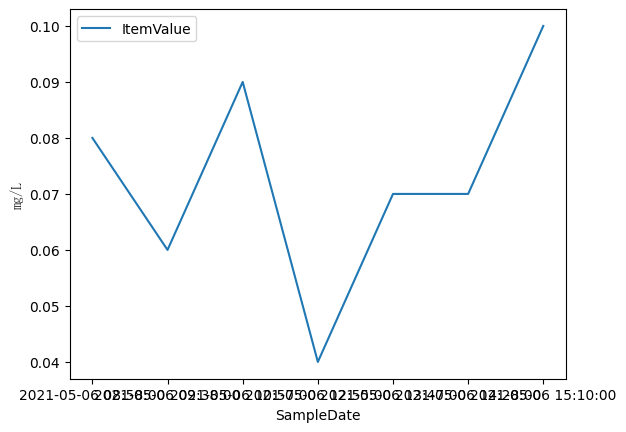

In [186]:
def simple_plot(df_src,x,y,title=None,xlabel=None,ylabel=None):
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')

    df_src.plot(x=x,y=y)
    plt.title(title,fontproperties=myfont)
    if xlabel:
        plt.xlabel(xlabel,fontproperties=myfont)
    if ylabel:
        plt.ylabel(ylabel,fontproperties=myfont)
    plt.show()

if 1:
    sql="""with t1 as(
select *,EXTRACT(MONTH FROM CAST ( "SampleDate" AS date )) as month,EXTRACT(YEAR FROM CAST ( "SampleDate" AS date )) as year from e_river_season_q where "Basin"='頭前溪流域' and "ItemName"='氨氮'
)
select distinct on ("SampleDate") * from t1 where year=2021 and month=5 order by "SampleDate";
    """
    df1 = sql_to_df(conn,sql) 
    df1=df1.sort_values(by=['SampleDate'])
    df1 = df1.astype({"ItemValue": float})
    df1=df1.sort_values(by=['SampleDate'])

    simple_plot(df1,x='SampleDate',y='ItemValue',xlabel=None,ylabel='mg/L')



# 數值分析

In [233]:
import numpy as np

df= pd.read_csv("~/Downloads/temp_water.csv")

if 1:
    x=df['mean']
    y=df['water_usage']
    r = np.corrcoef(x, y)
r

array([[ 1.        , -0.05426643],
       [-0.05426643,  1.        ]])

# 山河事件簿

In [122]:
#station_city=['臺東縣','屏東縣']
#from datetime import date

def riverlog_rain_hourdiff_mon(limit):
    date_str= date.today()
    station_city=None
    time_now = datetime.now()
    time_set = get_2slot(time_now-timedelta(minutes = 80),1)
    #time_set=['2021-06-11 08:00:00','2021-06-11 09:00:00']
    rain_load(gd, date_str,0,True)
    ret = rain_hourdiff(gd,time_set,station_city)
    if ret:
        df = gd['rain-hourdiff']
        df_cal = df[df['rain_1hour']>=limit]
        overlimit_cnt  = len(df_cal.index)
    else:
        overlimit_cnt=0
    result = [time_set[1], overlimit_cnt]
    return result

if 0:
    result = riverlog_rain_hourdiff_mon(10)
    print(result)

# Grafana

In [123]:
import time
import random

case_id="riverlog_rain_hourdiff_station_cnt"
period=60 # second
conn=connect_db()
while True:
    t_value = time.time()
    v=random.randint(0,99)
    sqls=[]
    if case_id=="test":
        sql="INSERT INTO t_time_series VALUES (%i,'test1', %i);" %(t_value,v)
        period=1
    if case_id=="pm25":
        url="https://pm25.lass-net.org/data/last.php?device_id=74DA38B053E4"
        filename="output/pm25_last.json"
        url_get(filename, url,True)
        data = load_json(filename)
        pm25=data['feeds'][0]['AirBox']['s_d0']
        sql="INSERT INTO t_time_series VALUES (%i,'pm25_74DA38B053E4', %.2f);" %(t_value,pm25)
        period=300
    if case_id=="riverlog_rain_hourdiff_station_cnt":
        result = riverlog_rain_hourdiff_mon(10)
        print("riverlog_rain_hourdiff_station_cnt=%s" %(result))
        date_obj = datetime.strptime(result[0], "%Y-%m-%d %H:%M:%S")
        t_value = date_obj.timestamp()
        sqls.append("delete from t_time_series where dt=%i" %(t_value))
        sqls.append("INSERT INTO t_time_series VALUES (%i,'%s', %.2f);" %(t_value,case_id,result[1]))
        period=10*60
    
    if len(sqls)>0:
        for sql in sqls:
            print(sql)
            sql_exec(conn,sql)
    else:
        print(sql)
        sql_exec(conn,sql)

    time.sleep(period)

Connected to the PostgreSQL database...
rain-station: output/rain-station.csv saved, shape = (2149, 6)
Today is 2021-07-11
rain-rainData: output/rain-rainData_2021-07-11.csv saved, shape = (83522, 3)
time_set=['2021-07-11 12:10:00', '2021-07-11 13:10:00']
timeGMT8              2021-07-11 12:10:00  2021-07-11 13:10:00
stationName                                                   
南投縣|中寮鄉|中寮|C0H950                     0.0                  0.0
南投縣|中寮鄉|蘆竹湳|C1I211                    0.0                  0.0
南投縣|仁愛鄉|仁愛|C0I390                     0.0                  0.0
南投縣|仁愛鄉|仁愛新村|81HA80                   0.0                  0.0
南投縣|仁愛鄉|元山橋|81HA70                    0.0                  0.0
...                                   ...                  ...
高雄市|阿蓮區|阿蓮(2)|01P500                  0.0                  0.0
高雄市|阿蓮區|阿蓮|C0V530                     0.0                  0.0
高雄市|鳳山區|鳳山|C0V440                     0.0                  0.0
高雄市|鳳山區|鳳山農試|G2P820                   0.0          

KeyboardInterrupt: 

# 情境 - A1
里到取水口

給個里

. desc(里)
.. [TODO]面積，人口，基本資料
.. 列出淨水場與取水口為何
. desc(淨水場)
.. 淨水場 GPS
.. 最新這期水質
.. 最近這期水量
. desc(取水口)
.. 取水口 GPS
.. 最近水量
.. 最近水質


In [118]:
def str_tran(line):
    ret = []
    g = re.match( r'(\d*).(\d*).(\d*)', line, re.M|re.I)

    if g:
        year = int(g.group(1))
        month = int(g.group(2))
        day=int(g.group(3))
        return [year,month,day]
    return ret

def datestr_to_month_between(date_str,delimiter="-"):
    fmt = "%%Y%s%%m%s%%d" % (delimiter,delimiter)
    date_obj = datetime.strptime(date_str, fmt)
    year=date_obj.year
    month = date_obj.month + 1
    if month>12:
        month=1
        year+=1
    fmt = "%%i%s%%02i%s01" % (delimiter,delimiter)
    return "%s" % date_obj.strftime("%Y-%m-01") , fmt %(year,month)

class Record():
    def __init__(self):
        self.mdf = None
        self.odf={} #key->df
        self.ddf = None
        self.debug=False
    def init(self,conn,sql):
        if self.debug:
            print("sql=%s" % (sql))
        self.mdf = sql_to_df(conn,sql)
    def init_d(self,conn,sql):
        if self.debug:
            print("sql=%s" % (sql))
        self.ddf = sql_to_df(conn,sql)
    def load_info(self,key,sql):
        if self.debug:
            print("sql=%s" % (sql))
        df = sql_to_df(conn,sql)
        if not df is None:
            self.odf[key]=df
        else:
            self.odf[key]=None
    def mget(self,col_id):
        col_s = self.mdf[col_id]
        if len(col_s.index)>0:
            return col_s.tolist()[0]
        else:
            return None
    def mdesc(self):
        if not self.mdf is None:
            print("Master record:\n%s " %(self.mdf))
        if not self.ddf is None:
            if len(self.ddf.index)>0:
                print("Detail record:\n%s " %(self.ddf))

        for key in self.odf.keys():
            print("\nOther record: %s" %(key))
            if not self.odf[key] is None:
                print(self.odf[key])

class ValueDomain():
    def __init__(self):
        self.df = None
        self.pos={}
        self.rev={}
    def load(self,conn):
        sql = "select * from s_value_domain"
        self.df = sql_to_df(conn,sql)
        for index, row in self.df.iterrows():
            key = "%s|%s|%s" %( row['a_domain'],row['b_domain'],row['a_value'])
            self.pos[key]=row['b_value']
            key = "%s|%s|%s" %( row['b_domain'],row['a_domain'],row['b_value'])
            self.rev[key]=row['a_value']
    def map(self,a_domain,b_domain,value_src,b_pos=True):
        value = value_src
        if b_pos:
            key = "%s|%s|%s" % (a_domain,b_domain,value_src)
            if key in self.pos:
                value = self.pos[key]
        else:
            key = "%s|%s|%s" % (b_domain,a_domain,value_src)
            if key in self.rev:
                value = self.rev[key]
        return value
        
        
#init
vd=ValueDomain()
vd.load(conn)

#input 
vil = "水源里"
sql_t="select * from s_village_waterin where \"VILLNAME\"='%s';" 
sql = sql_t % (vil)

vw=Record()
vw.init(conn,sql)
waterwork_str=vw.mget('WATERWORK')
waterin_str=vw.mget('WATERIN')


sql_t="select * from s_info_point where name='%s'"
sql = sql_t %(vd.map('s_village_waterin.WATERWORK','s_info',waterwork_str))
vw.load_info('waterwork',sql)

waterin_str2=vd.map('s_village_waterin.WATERIN','s_info',waterin_str)
sql_t="select * from s_info_point where name='%s'"

sql = sql_t %(waterin_str2)
vw.load_info('waterin',sql)

print("----- 里到取水口 資訊以及基本資料 ")
vw.mdesc()

#淨水場位置
sql="select * from m_waterwork_area where \"淨水場名稱\"='%s' and \"區處別\"=3" %(waterwork_str)
df = sql_to_df(conn,sql)
print("----- 淨水場位置 ")
print(df)
#淨水場供水量
print("----- 淨水場供水量 ")
sql_t="select * from s_waterwork_qty where waterwork='%s'"
#waterwork_str="寶山淨水廠"
sql = sql_t %(waterwork_str)

waterwork=Record()
waterwork.init_d(conn,sql)
waterwork.mdesc()
if len(waterwork.ddf.index)==0:
    print("%s 沒有供水量資料" %(waterwork_str))
else:
    #顯示最新一個月的供水量
    # get max_date

    sql_t="select max(date) as date from s_waterwork_qty where waterwork='%s'"
    sql= sql_t %(waterwork_str)
    df = sql_to_df(conn,sql)
    date_obj=df['date'].to_list()[0]
    date_str=date_obj.strftime("%Y-%m-%d")
    print(date_str)
    date_s,date_e = datestr_to_month_between(date_str)

    # sql
    sql="select * from s_waterwork_qty where waterwork='%s' and date >='%s' and date < '%s' order by date" %(waterwork_str,date_s,date_e)
    #print(sql)
    df = sql_to_df(conn,sql)
    print("%s 最新的月供水量資料: 單位（噸）" % (waterwork_str))
    print(df)

#淨水場水質
#顯示最新一個月的水質（環保署）
print("----- 淨水場水質 ")
# get max_date 110.01.05
sql="select max(\"CKDATE\") as date from e_waterwork_q"
df = sql_to_df(conn,sql)
date_str=df['date'].to_list()[0]
year,month,day = str_tran(date_str)

date_s = "%i.%02i.01" %(year,month)
month+=1
if month>12:
    month=1
    year+=1
#date_str = "%i.%02i.%02i" % (year,month,day)
#print(datestr_to_month_between(date_str,"."))
date_e = "%i.%02i.01" %(year,month)
waterwork_str2 = vd.map('s_village_waterin.WATERWORK','e_waterwork_q',waterwork_str) #'新竹給水廠新竹第二淨水場'

sql_t = "select \"ITEM\",CAST(\"CKDATE\" as date),\"ITEMVAL\" from e_waterwork_q where \"PLANT\"='%s' and \"CKDATE\">= '%s' and \"CKDATE\"< '%s' order by \"CKDATE\""
sql = sql_t % (waterwork_str2,date_s,date_e)
#print(sql)
df = sql_to_df(conn,sql)
print("%s 最新的月水質資料:" % (waterwork_str2))
print(df)
#取水口位置
sql="select ST_AsText(ST_Transform(geom,4326)) as wkt from s_waterin_b where name='%s';" %(waterin_str) #頭前溪(隆恩堰）
df = sql_to_df(conn,sql)
print("----- 取水口位置 %s " %(waterin_str))
print(df)

#取水口取水量 s_waterin_qty
print("----- 取水口取水量 ")
sql="select max(date) as date from s_waterin_qty where waterin='%s'" %(waterin_str2) #0110年5月1日
df = sql_to_df(conn,sql)
date_obj=df['date'].to_list()[0]
date_str=date_obj.strftime("%Y-%m-%d")
date_s,date_e = datestr_to_month_between(date_str)
sql="select * from s_waterin_qty where waterin='%s' and date >='%s' and date < '%s'" %(waterin_str2,date_s,date_e)
df = sql_to_df(conn,sql)
print("%s 最新的取水量資料:" % (waterin))
print(df)

#取水口水質
print("----- 取水口水質 ")
sql="select max(date) as date from s_waterin_quality"
df = sql_to_df(conn,sql)
date_obj=df['date'].to_list()[0]
date_str=date_obj.strftime("%Y-%m-%d")
date_s,date_e = datestr_to_month_between(date_str)

sql="select * from s_waterin_quality where waterwork='%s' and date >='%s' and date < '%s'" %(waterwork_str,date_s,date_e)
#print(sql)
df = sql_to_df(conn,sql)
print("%s 最新的月水質資料:" % (waterwork_str))
print(df)







----- 里到取水口 資訊以及基本資料 
Master record:
      VILLCODE COUNTYNAME TOWNNAME VILLNAME        VILLENG COUNTYID  \
0  10018010039        新竹市       東區      水源里  Shuiyuan Vil.        O   

   COUNTYCODE TOWNID    TOWNCODE  NOTE WATERWORK   WATERIN  
0     10018.0    O01  10018010.0  None     第二淨水場  頭前溪(隆恩堰）   

Other record: waterwork
   geo_type   geo                                    id     name catagory  \
0       1.0  None  64516083-1319-4f8b-a68f-83e04c286257  新竹第二淨水場      淨水場   

    desc src_id json_def  urls  
0  位於博愛街   None     None  None  

Other record: waterin
   geo_type   geo                                    id name catagory  \
0       1.0  None  45592f5e-7e9f-487a-ae21-3e0efef18d69  隆恩堰      取水口   

                                                desc  src_id json_def  \
0  隆恩堰位於新竹縣頭前溪中游經國橋上游約1公里之竹東鎮與竹北市交界處，由原新竹水利會隆恩取水口...     0.0     None   

                                                urls  
0  隆恩堰|https://www.wranb.gov.tw/3452/3475/26113/%...  
----- 淨水場位置 
   區處別  淨水場

In [11]:
import geopandas
sql="select * from basin"
gdf = geopandas.read_postgis(sql,conn)
gdf['area_my'] = gdf.area
#gdf.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
138    MultiPolygon
139    MultiPolygon
140    MultiPolygon
141    MultiPolygon
142    MultiPolygon
Length: 143, dtype: object

In [46]:
#頭前溪流域內的水質測站
#sql="select * from basin where basin_name='頭前溪'"
sql="select * from basin"
gdf1 = geopandas.read_postgis(sql,conn)

sql="select * from e_river_station"
gdf2 = geopandas.read_postgis(sql,conn)
gdf2=gdf2.set_crs('epsg:3826')

from geopandas.tools import sjoin
gdf4 = sjoin(gdf2, gdf1, how='left')
gdf4[gdf4['basin_name']=='頭前溪'][['sitename','basin','basin_name']]


,sitename,basin,basin_name
33,中正大橋,頭前溪流域,頭前溪
46,內灣吊橋,頭前溪流域,頭前溪
105,竹東大橋,頭前溪流域,頭前溪
106,竹林大橋,頭前溪流域,頭前溪
215,湳雅取水口(取代溪洲大橋),頭前溪流域,頭前溪
244,瑞昌大橋(原為瑞豐大橋),頭前溪流域,頭前溪
269,頭前溪橋,頭前溪流域,頭前溪
290,寶山水庫取水口,頭前溪流域,頭前溪


In [50]:
sql="select * from riverpoly_rivercode where river_name='頭前溪'"
gdf1 = geopandas.read_postgis(sql,conn)
sql="select * from e_river_station where basin='頭前溪流域'"
gdf2 = geopandas.read_postgis(sql,conn)
gdf2=gdf2.set_crs('epsg:3826')
gdf2.distance(gdf1)

/Volumes/F2020/opt/anaconda3/envs/py37/lib/python3.7/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
dtype: float64

# flwdir

In [1]:

from codes.flwdir import *
from shapely.geometry import *
import geopandas as gpd

fd = FlwDir()
fd.reload()
fd.init()
if 1: # filename rule: None: return json, '' use default filename
    fd.streams(9,'')
    fd.desc_stream()
if 1:
    points=[[260993,2735861,'油羅上坪匯流'],[253520,2743364,'隆恩堰'],[247785,2746443,'湳雅取水口']]
    bas_gdf = fd.basins(points,'')
    fd.path(points,'')
    #a=bas_gdf[1].iloc[1]['geometry']
    #b=bas_gdf[0].iloc[1]['geometry']
    #fd.diff_basins(a,b)

if 1:
    for i in range(7,11):
        fd.subbasins_streamorder(i,'')
if 0:
    wkt_str="MultiLineString ((255779.34444821099168621 2742184.59869130607694387, 255062.52472444207523949 2741882.12604631343856454, 254328.86074706495855935 2742279.99766481388360262))"
    fd.join_line(wkt_str) #modify gdf

if 1:
    points=[[260993,2735861,'油羅上坪匯流'],[253520,2743364,'隆恩堰'],[247785,2746443,'湳雅取水口']]
    fd.basins(points,'')

    bas_df = fd.gdf_bas

    for index, row in bas_df.iterrows():
        if row['name']=='隆恩堰' and row['value']==1:

            a = row['geometry']
        if row['name']=='油羅上坪匯流' and row['value']==1:
            b = row['geometry']
    c=a.difference(b)

    gs = gpd.GeoSeries([c],crs=fd.crs)
    gs.to_file('output/basin_diff_2point.geojson', driver='GeoJSON')


data/C1300_20m_LDD.tif info:<open DatasetReader name='data/C1300_20m_LDD.tif' mode='r'>
data/C1300_20m_elv0.tif info:<open DatasetReader name='data/C1300_20m_elv0.tif' mode='r'>
{'ftype': 'ldd',
 'idxs_ds': array([-1, -1, -1, ..., -1, -1, -1], dtype=int32),
 'idxs_pit': array([ 540653, 1909678, 2635460, 3276180, 4662033, 4779528], dtype=int32),
 'idxs_seq': None,
 'latlon': False,
 'ncells': 2199615,
 'shape': (2197, 2180),
 'transform': Affine(20.00229477064219, 0.0, 239707.5006,
       0.0, -20.00229476558928, 2751895.7128)}
index=0,length=64969,seg cnt=2757,avg_len=23.6,start=(255899.35821683484, 2715201.503052526),end=(243037.8826793119, 2749385.4248069185),idxs=3998929
index=1,length=14610,seg cnt=637,avg_len=22.9,start=(265760.48953876144, 2715881.5810745563),end=(261640.01681600916, 2721442.21901939),idxs=3925302
index=2,length=4380,seg cnt=191,avg_len=22.9,start=(264300.32202050457, 2721542.230493218),end=(261640.01681600916, 2721442.21901939),idxs=3308289
index=3,length=22579,